Rule-Based Machine Learning

Import Libraries & Load Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


Data Cleaning & Feature Engineering

In [2]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


/tmp/ipython-input-2029780129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-2029780129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Decision Trees do NOT need scaling (interview gold!)

Select Features & Target

In [3]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']]
y = df['Survived']


Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train Decision Tree (Unrestricted)

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Make Predictions

In [6]:
y_pred_dt = dt.predict(X_test)


Evaluate Model

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.7653631284916201

Confusion Matrix:
 [[83 22]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



You may see very high accuracy → but beware of overfitting

Control Overfitting (MOST IMPORTANT PART)

In [8]:
dt_pruned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_pruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [9]:
y_pred_pruned = dt_pruned.predict(X_test)

print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Tree Accuracy: 0.8044692737430168


Slightly lower accuracy but much better generalization

Feature Importance (VERY IMPORTANT)

In [10]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_pruned.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance


,Feature,Importance
1,Sex,0.552230
0,Pclass,0.191027
3,Fare,0.126648
2,Age,0.086213
4,FamilySize,0.043883


Trees explain what matters most clearly

Visualize the Decision Tree

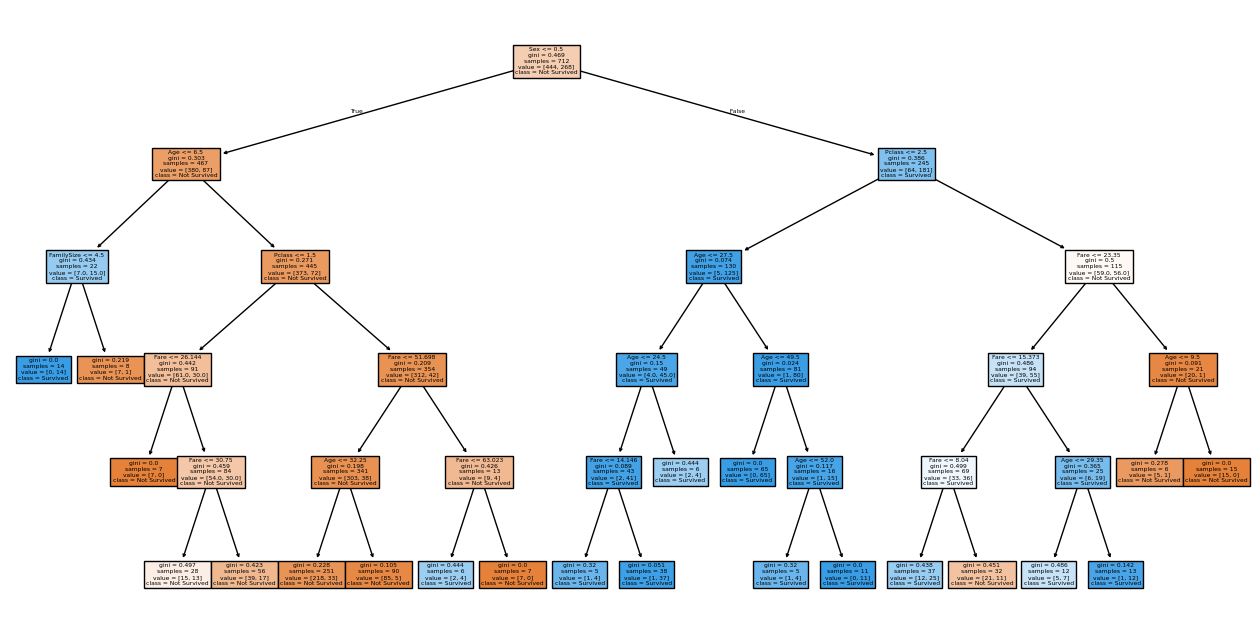

In [11]:
plt.figure(figsize=(16,8))
plot_tree(
    dt_pruned,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True
)
plt.show()
